<a href="https://colab.research.google.com/github/AnhVietPham/Deep-Learning/blob/main/Homework_A_CLASSIFIER_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image

In [2]:
transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root = './data', train = True, 
                                        download=True, 
                                        transform= transforms)

trainloader = torch.utils.data.DataLoader(trainset, batch_size= batch_size, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train = False,
                                       download = True, transform = transforms)

testloader = torch.utils.data.DataLoader(testset, batch_size= batch_size,
                                         shuffle = False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


torch.Size([4, 3, 32, 32])
torch.Size([4])


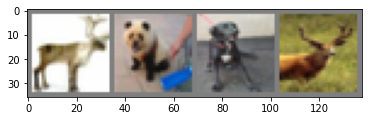

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)
print(labels.shape)

imshow(torchvision.utils.make_grid(images))

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module): 
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

In [5]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

In [7]:
for epoch in range(2):
  running_loss = 0.0
  for i, data in enumerate(trainloader,0):
    inputs, labels = data

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
      running_loss == 0.0

print('Finished Training')

[1,  2000] loss: 2.172
[1,  4000] loss: 3.975
[1,  6000] loss: 5.629
[1,  8000] loss: 7.203
[1, 10000] loss: 8.714
[1, 12000] loss: 10.182
[2,  2000] loss: 1.400
[2,  4000] loss: 2.759
[2,  6000] loss: 4.117
[2,  8000] loss: 5.458
[2, 10000] loss: 6.772
[2, 12000] loss: 8.068
Finished Training


In [8]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [9]:
testiter = iter(testloader)
images, labels = testiter.next()

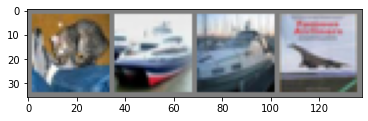

In [10]:
imshow(torchvision.utils.make_grid(images))

In [11]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [12]:
outputs = net(images)

In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car  ship  ship


In [14]:
correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)

    _, predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct/total))

Accuracy of the network on the 10000 test images: 54 %


In [17]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predictions = torch.max(outputs, 1)

    for label, prediction in zip(labels, predictions):
      if label == prediction:
        correct_pred[classes[label]] += 1
      total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
  accuracy = 100 * float(correct_count) / total_pred[classname]
  print("Accuracy for class {:5s} is: {:.1f} %".format(classname,accuracy))

Accuracy for class plane is: 61.2 %
Accuracy for class car   is: 84.1 %
Accuracy for class bird  is: 34.3 %
Accuracy for class cat   is: 38.2 %
Accuracy for class deer  is: 44.2 %
Accuracy for class dog   is: 46.8 %
Accuracy for class frog  is: 66.4 %
Accuracy for class horse is: 62.0 %
Accuracy for class ship  is: 60.8 %
Accuracy for class truck is: 43.6 %
